In [7]:
import numpy as np
from collections import Counter

# Algorithm Implementation
# Create A Node Class

In [8]:
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

# Create Decision Tree Class

In [9]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
        
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        
        # Check the stopping criteria
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            leaf_value = self._calculate_leaf_value(y)
            return Node(value=leaf_value)
        
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, feat_idxs)
        
        # If no valid split is found, create a leaf node
        if best_feature is None or best_threshold is None:
            leaf_value = self._calculate_leaf_value(y)
            return Node(value=leaf_value)
        
        # Create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_threshold, left, right)
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thresh in thresholds:
                # Calculate the variance reduction
                gain = self._variance_reduction(y, X_column, thresh)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thresh
                    
        return split_idx, split_threshold
    
    def _variance_reduction(self, y, X_column, threshold):
        parent_variance = np.var(y)
        
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        var_left, var_right = np.var(y[left_idxs]), np.var(y[right_idxs])
        weighted_variance = (n_left / n) * var_left + (n_right / n) * var_right
        
        return parent_variance - weighted_variance
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    
    def _calculate_leaf_value(self, y):
        return np.mean(y)
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Importing Data and Libraries

In [10]:
import pandas as pd

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Splitting into input feature (X) and output (y)

In [12]:
X = dataset.iloc[:, 1 : -1].values
y = dataset.iloc[:, -1].values
print('X shape :', X.shape)
print('y shape :', y.shape)


X shape : (10, 1)
y shape : (10,)


# Fit the model to the data

In [13]:
regressor = DecisionTree()
regressor.fit(X, y)

In [14]:
predictions=regressor.predict(X)

In [15]:
predictions, y

(array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
         200000.,  300000.,  500000., 1000000.]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [16]:
pred = regressor.predict([[6.5]])
print(pred[0],predictions[6])

200000.0 200000.0


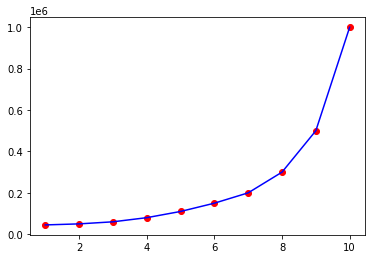

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color = 'r')
plt.plot(X,regressor.predict(X), color = 'b')
plt.show()

As you can see from the above given input 6.5 it gives me the same output as for input 6, so it means that this is not continuous but the above plot shows this continuous so let's modify the graph for non-continuous values

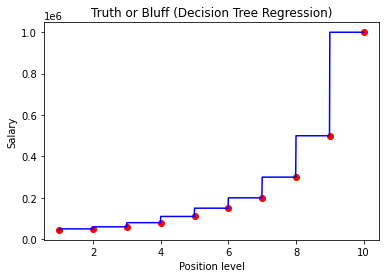

In [19]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Now here we are... look at the above plot and now it reflect the fact that the intervel between 6 and seven the output will be 200000

Let's See The result of applying decision tree model from sklear on the same dataset

In [20]:
from sklearn import tree

In [21]:
reg = tree.DecisionTreeRegressor()
reg.fit(X,y)

DecisionTreeRegressor()

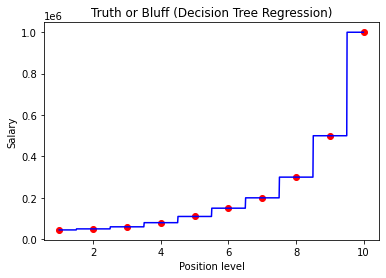

In [22]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()